### 확인
- 17세 학생 중에서도
- 남학생이고
- 부모님 교육 수준이 낮고
- 가족관계는 화목할수록
- 음주 수준이 높다

-> 위를 확인하려고함
- 남학생, 여학생의 음주수준이 차이가 나서 이 부분을 중점으로 살펴봄
- 해당 부분에서 학교 간의 차이는 거의 없어서 성별 위주로 살펴봄

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('student-lpor.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [3]:
# 17세 데이터 분리

df = df[df['age']==17]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,2,10,13
18,GP,M,17,U,GT3,T,3,2,services,services,...,no,5,5,5,2,4,5,2,8,8
78,GP,M,17,U,GT3,T,2,1,other,other,...,no,4,5,1,1,1,3,0,9,9
118,GP,M,17,R,GT3,T,1,3,other,other,...,no,5,2,4,1,4,5,14,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,MS,F,17,R,GT3,T,1,2,other,other,...,no,3,5,5,1,3,1,4,7,8
635,MS,F,17,R,GT3,T,3,1,at_home,other,...,no,4,5,4,2,3,1,10,8,9
638,MS,M,17,U,GT3,T,2,3,other,services,...,no,4,4,3,1,1,3,4,14,15
642,MS,F,17,U,GT3,T,4,3,teacher,other,...,no,5,5,4,1,1,1,0,6,9


In [4]:
# Dalc, Walc에 따른 veryLow, Low, other 열 추가

def classify_Alc(row):
    if row['Dalc'] == 1 and row['Walc'] == 1:
        return 'Very Low'
    elif (row['Dalc'] <= 2 and row['Walc'] <= 2) and (row['Dalc'] != 1 and row['Walc'] != 1):
        return 'Low'
    else:
        return 'Other'

df['classify_Alc'] = df.apply(classify_Alc, axis = 1)

C:\Users\parky\AppData\Local\Temp\ipykernel_18780\4277829829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classify_Alc'] = df.apply(classify_Alc, axis = 1)


In [8]:
# Dalc, Walc에 따른 veryLow, Low, other 열 추가

def classify_Alc(row):
    if row['Dalc'] == 1 and row['Walc'] == 1:
        return 'Very Low'
    elif (row['Dalc'] <= 2 and row['Walc'] <= 2) and (row['Dalc'] != 1 and row['Walc'] != 1):
        return 'Low'
    else:
        return 'Other'
male['classify_Alc'] = df.apply(classify_Alc, axis = 1)

C:\Users\parky\AppData\Local\Temp\ipykernel_18780\79791756.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['classify_Alc'] = df.apply(classify_Alc, axis = 1)


In [ ]:
### Dalc, Walc에 따른 veryLow, Low, other 열 추가

def classify_Alc(row):
    if row['Dalc'] <= 2 and row['Walc'] <= 2:
        if row['Dalc'] == 1 and row['Walc'] == 1:
            return 'Very Low'
        else:
            return 'Low'
    else:
        return 'Other'

df['classify_Alc'] = df.apply(classify_Alc, axis = 1)

In [9]:
columns = list(df.columns)
columns.remove('Dalc')
columns.remove('Walc')
columns.remove('age')
columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'G1',
 'G2',
 'classify_Alc']

In [10]:
## 그룹 설정, 시각화, 제목 짓기

def set_grouped(df_, col):
    grouped = df_.groupby([col, 'classify_Alc']).size().unstack()
    grouped_ratio = grouped.div(grouped.sum(axis = 1), axis = 0)
    return grouped_ratio

def draw_barplot(groupRatio, a, b):
    groupRatio.plot.bar(stacked = True, ax = axes[a, b])

def setTitle(location, col):
    location.set_title(col)

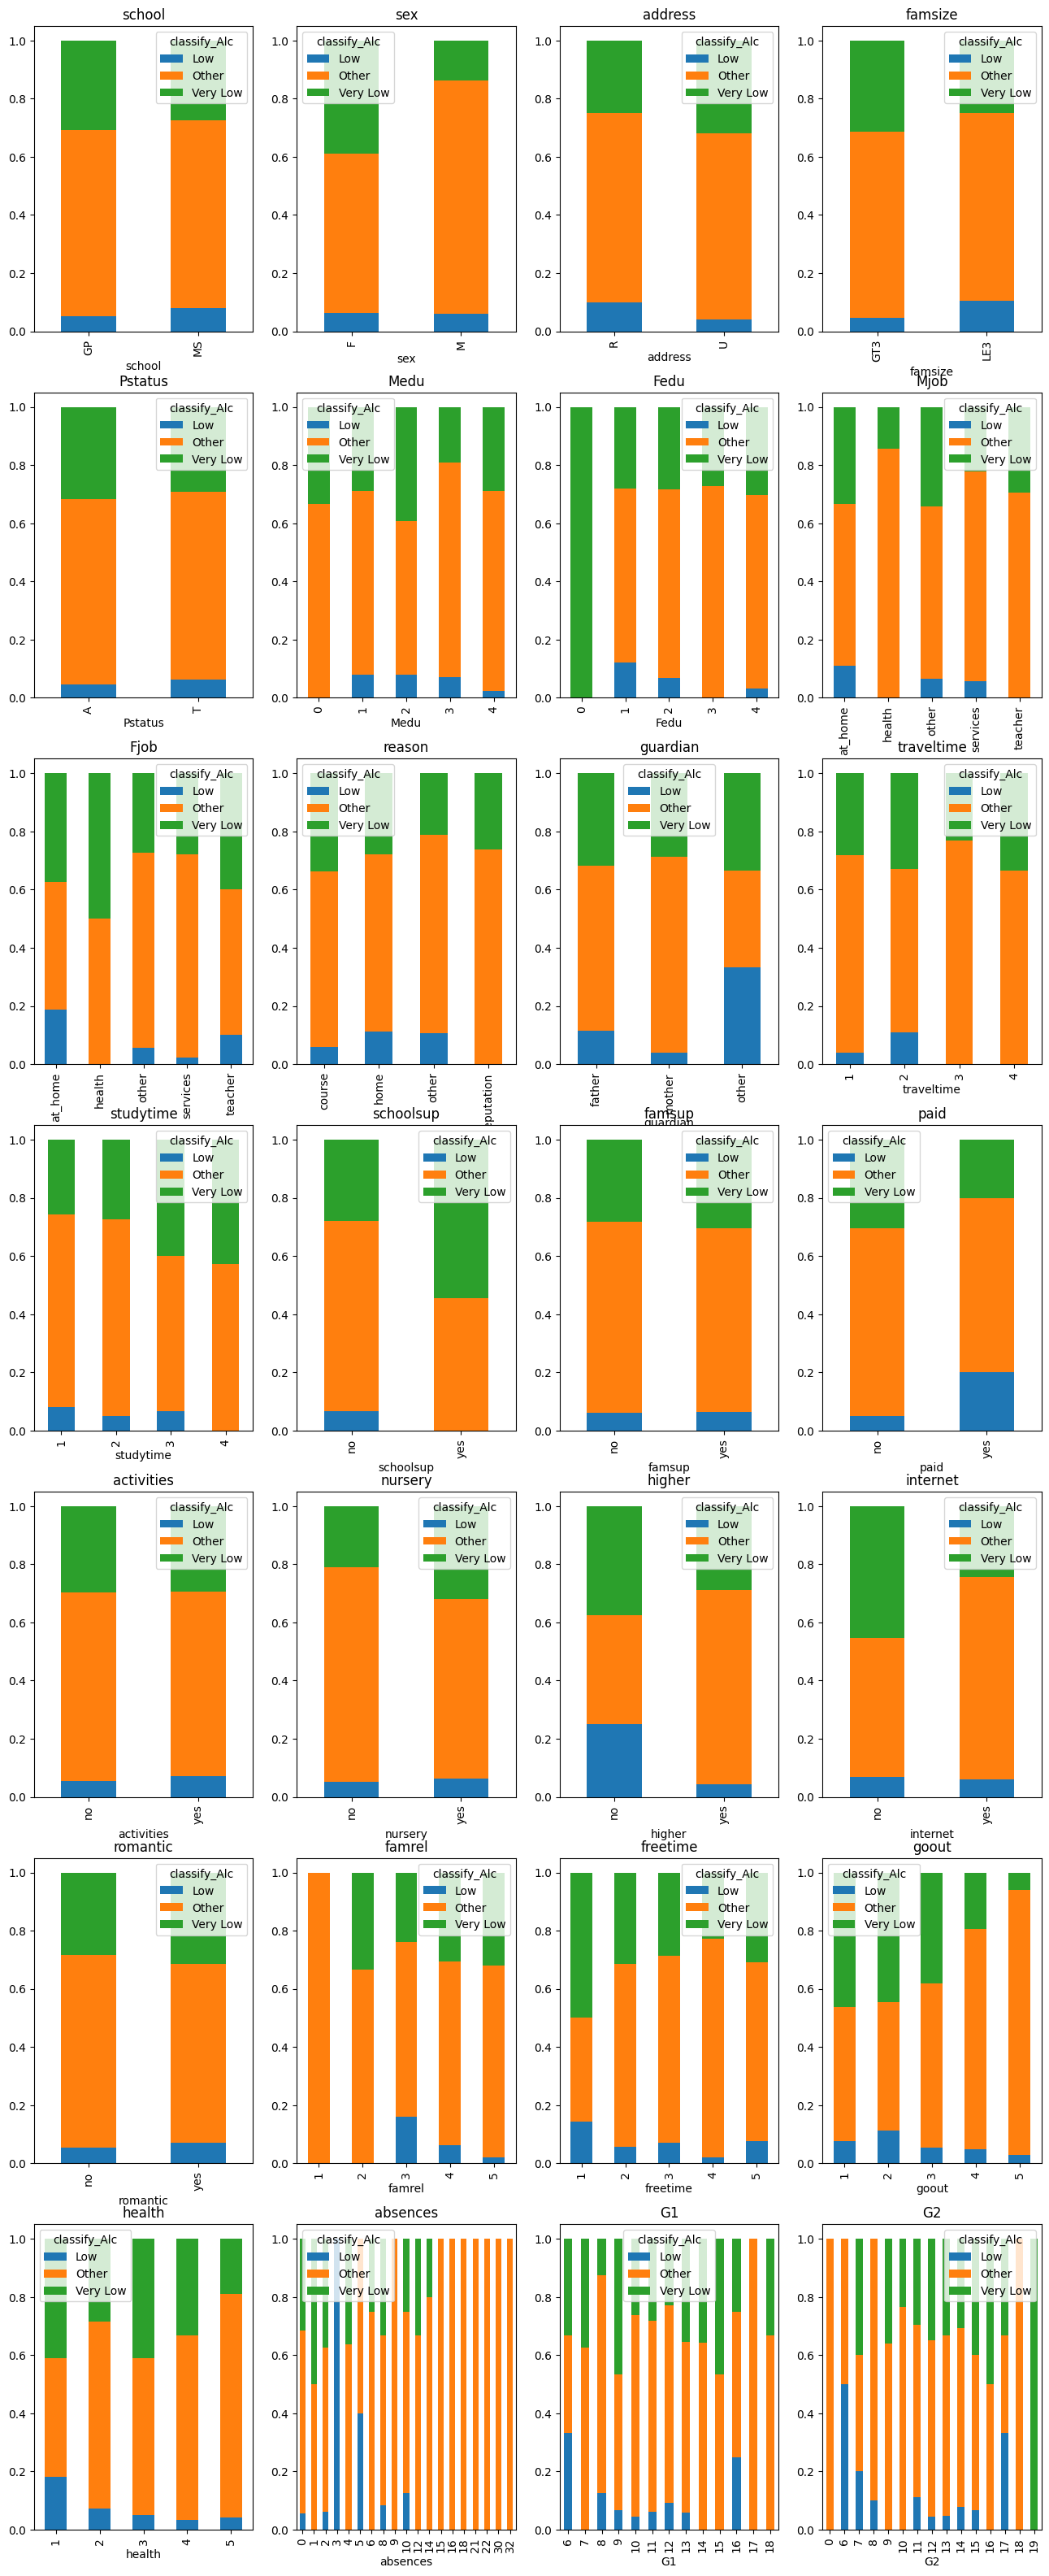

In [11]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

# sex : 남학생의 other 비율이 확연히 높음
# Fedu : 아버지의 교육수준이 낮을 때 오히려 very low : 데이터 개수 확인
# Fjobs : 아버지가 teacher, at_home일 때 low, very low 비율이 높아보임
# reason : 학교 선택이유가 course일 때 very low가 높음
## guardian : other일때 오히려 very low, low 비율이 높음
# schoolsup : yes일 때 낮음
# higher : 학위 취득 의욕이 있는데 오히려 더 음주 소비 수준이 높음
# internet : 인터넷 접속 가능할 때 더 높음
# famrel : 음주 소비 수준이 낮은 그룹의 가족 관계가 더 좋음 - 확인 필요
# goout : other 그룹의 goout 수준이 가장 높음
# absence : other 그룹의 absence 수준이 가장 높음

In [12]:
# sex : 남학생의 other 비율이 확연히 높음
# Fedu : 아버지의 교육수준이 낮을 때 오히려 very low : 데이터 개수 확인
# Fjob : 아버지가 teacher, at_home일 때 low, very low 비율이 높아보임
# reason : 학교 선택이유가 course일 때 very low가 높음
# guardian : other일때 오히려 very low, low 비율이 높음
# schoolsup : yes일 때 낮음
# higher : 학위 취득 의욕이 있는데 오히려 더 음주 소비 수준이 높음
# internet : 인터넷 접속 가능할 때 더 높음
# famrel : 음주 소비 수준이 낮은 그룹의 가족 관계가 더 좋음 - 확인 필요
# goout : other 그룹의 goout 수준이 가장 높음
# absence : other 그룹의 absence 수준이 가장 높음

In [13]:
# guardian 관련
df['guardian'].value_counts()

# 그냥 데이터가 딱 3개여서 0.3씩 나뉜듯 , 그럼 유의미한 컬럼은 아닌듯

mother    132
father     44
other       3
Name: guardian, dtype: int64

In [14]:
df.groupby('guardian')['classify_Alc'].value_counts(normalize=True)
# 그리고 엄마이든 아빠이든 other 그룹의 음주 수준이 높아서 엄마, 아빠가 보호자인 것이 알코올 소비 수준에 영향이 있다고 하기 어려울 듯


guardian  classify_Alc
father    Other           0.568182
          Very Low        0.318182
          Low             0.113636
mother    Other           0.674242
          Very Low        0.287879
          Low             0.037879
other     Low             0.333333
          Other           0.333333
          Very Low        0.333333
Name: classify_Alc, dtype: float64

In [15]:
df.groupby(['sex','school'])['classify_Alc'].value_counts(normalize=True)

# 학교 불문, 남학생의 음주 수준이 더 높은 이유는?
# 남학생과 상관관계가 높은 컬럼 확인

sex  school  classify_Alc
F    GP      Other           0.567568
             Very Low        0.391892
             Low             0.040541
     MS      Other           0.512821
             Very Low        0.384615
             Low             0.102564
M    GP      Other           0.767442
             Very Low        0.162791
             Low             0.069767
     MS      Other           0.869565
             Very Low        0.086957
             Low             0.043478
Name: classify_Alc, dtype: float64

In [16]:
# # 'sex' 원핫 인코딩

# from sklearn.preprocessing import OneHotEncoder

# encoder= OneHotEncoder(sparse=False)
# encoder_data = encoder.fit_transform(df[['sex']])
# df_encoded = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out())

In [17]:
# df2 = pd.concat([df, df_encoded], axis=1)

In [18]:
# df2.corr()

# plt.figure(figsize=(10,7))
# sns.heatmap(data=df2.corr(), fmt='.2f', annot=True)

In [19]:
male = df[df['sex']=='M']

<Axes: >

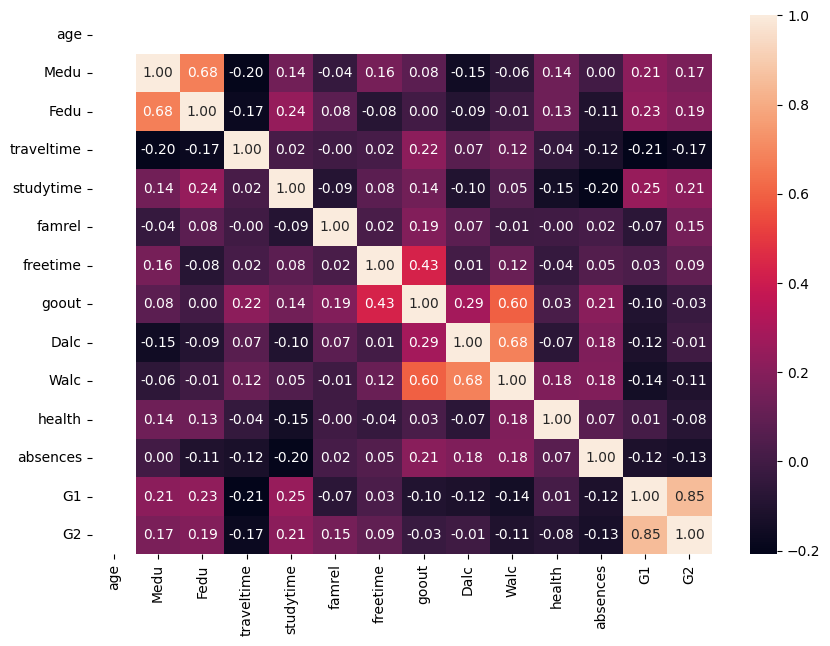

In [20]:
male.corr()

plt.figure(figsize=(10,7))
sns.heatmap(data=male.corr(), fmt='.2f', annot=True)

### 17세 이상 남학생에게서 상관관계가 높은 것
- absences : -0.65
- freetime : 0.52
- Fedu : -0.40
- Medu : 0.39


### 결석

In [21]:
male.groupby(['school','classify_Alc'])['absences'].value_counts(normalize=True)


school  classify_Alc  absences
GP      Low           0           0.333333
                      2           0.333333
                      8           0.333333
        Other         0           0.393939
                      2           0.121212
                      4           0.090909
                      6           0.090909
                      8           0.060606
                      14          0.060606
                      22          0.060606
                      10          0.030303
                      15          0.030303
                      16          0.030303
                      18          0.030303
        Very Low      0           0.428571
                      2           0.285714
                      4           0.142857
                      10          0.142857
MS      Low           0           1.000000
        Other         0           0.350000
                      4           0.250000
                      2           0.150000
                      8

In [22]:
female=df[df['sex']=='F']

In [23]:
df['absences'].mean()

4.083798882681564

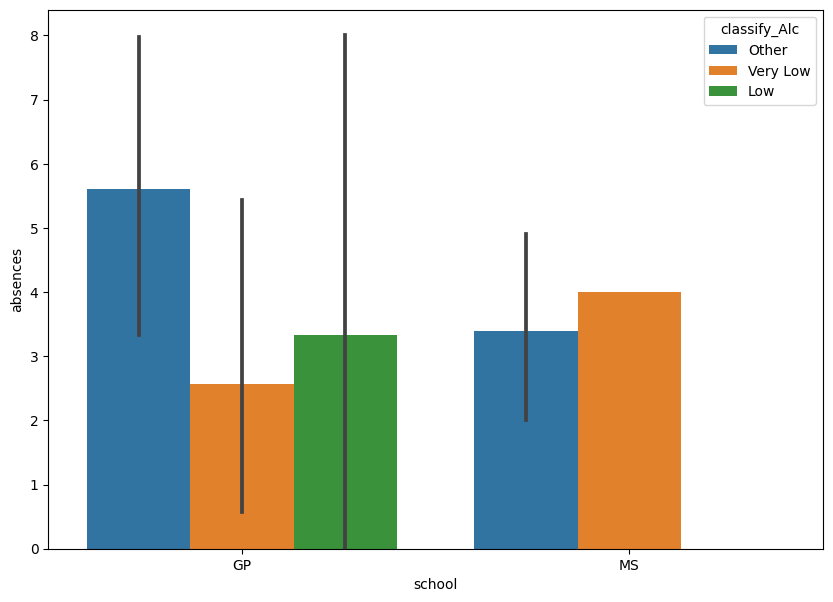

In [24]:
# absences 
figure,axes =plt.subplots(figsize=(10,7))
sns.barplot(data=male, x='school', y='absences', hue='classify_Alc')
plt.show()

# 앞서 남학생들이 음주 수준이 높음을 확인
# GP 학교의 경우 전체 데이터의 결석보다 약간 높은 수준 -> 주의할 필요가 있음
# MS 의 경우 어느 그룹이든 전체 평균보다 낮거나 평균 정도여서 결석이 큰 영향이 있다고 하기 어려움


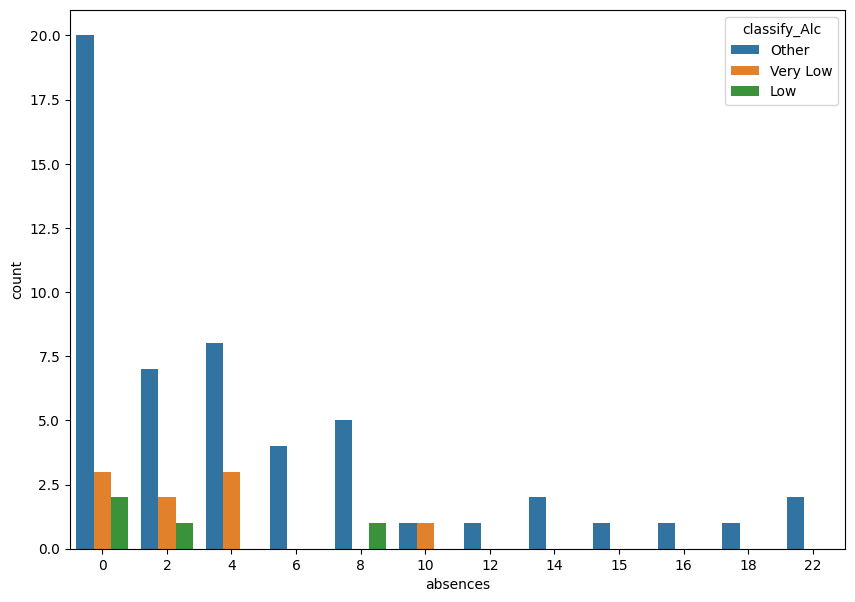

In [25]:
# absences 
figure,axes =plt.subplots(figsize=(10,7))
sns.countplot(data=male, x='absences', hue='classify_Alc')
plt.show()

# 앞서 남학생들이 음주 수준이 높음을 확인
# GP 학교의 경우 전체 데이터의 결석보다 약간 높은 수준 -> 주의할 필요가 있음
# MS 의 경우 어느 그룹이든 전체 평균보다 낮거나 평균 정도여서 결석이 큰 영향이 있다고 하기 어려움


### 아버지 교육 수준

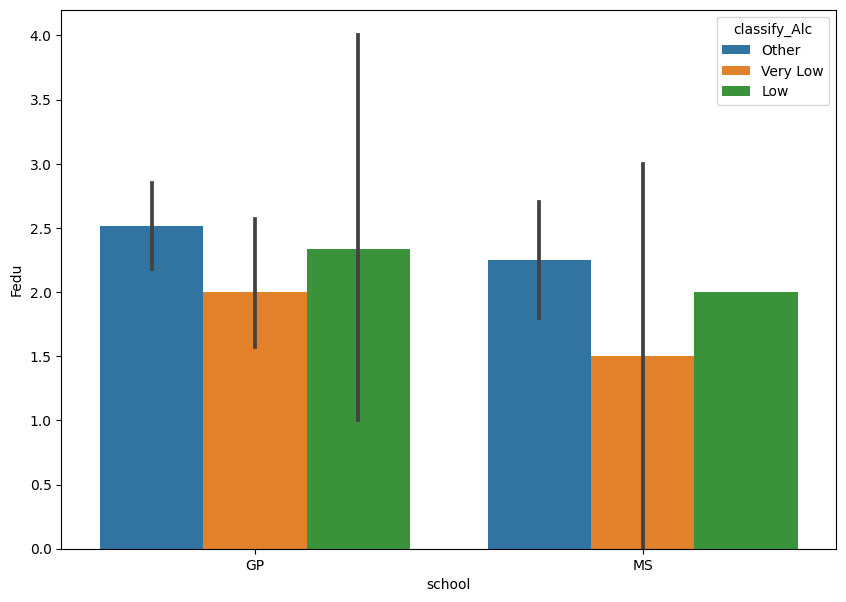

In [26]:
# Fedu
figure,axes =plt.subplots(figsize=(10,7))
sns.barplot(data=male, x='school', y='Fedu', hue='classify_Alc')
plt.show()

# MS : 아버지 교육 수준이 낮은 편, 2.5면 고등학교 이하

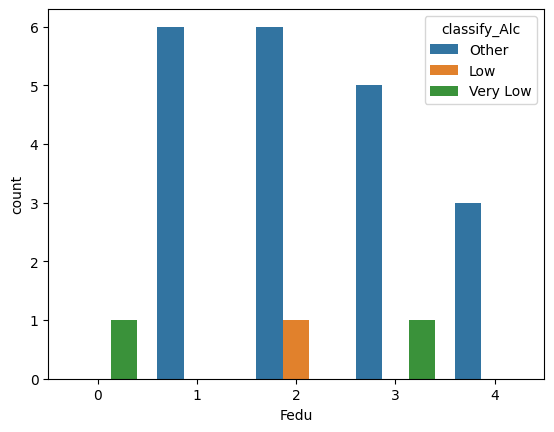

In [29]:
# ms 학교만 분석
sns.countplot(data=ms, x='Fedu', hue='classify_Alc')

plt.show()

In [30]:
ms['Fedu'].value_counts(normalize=True)

2    0.304348
1    0.260870
3    0.260870
4    0.130435
0    0.043478
Name: Fedu, dtype: float64

### 어머니 교육 수준

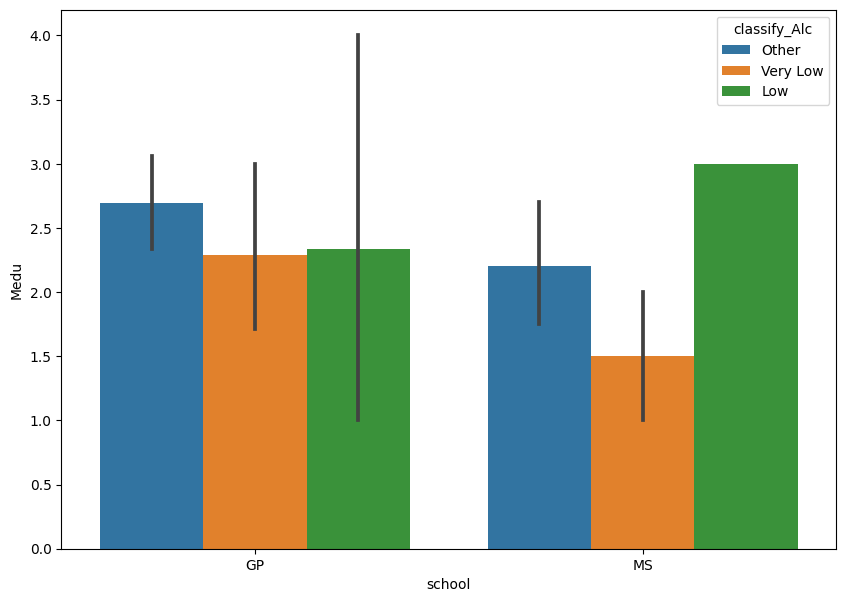

In [31]:
# Medu
figure,axes =plt.subplots(figsize=(10,7))
sns.barplot(data=male, x='school', y='Medu', hue='classify_Alc')
plt.show()

# MS : 어머니 교육 수준이 낮은 편 - other, very low에서 / 고등학교 이하, 고등교육 정도임

In [32]:
ms['Medu'].value_counts(normalize=True)

1    0.347826
2    0.260870
3    0.260870
4    0.130435
Name: Medu, dtype: float64

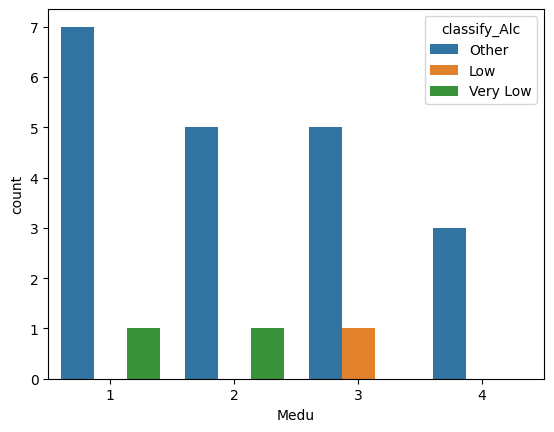

In [33]:
# ms 학교만 분석
sns.countplot(data=ms, x='Medu', hue='classify_Alc')

plt.show()

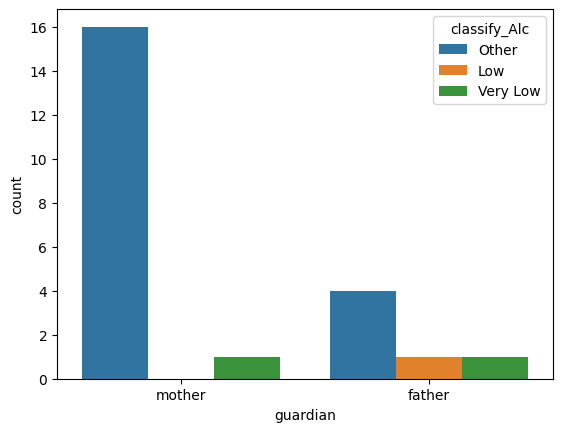

In [34]:
# ms 학교만 분석
sns.countplot(data=ms, x='guardian', hue='classify_Alc')

plt.show()

C:\Users\parky\AppData\Local\Temp\ipykernel_18780\804746564.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowedu = ms[(ms['Fedu']<= 2) | (female['Medu'] <= 2)]


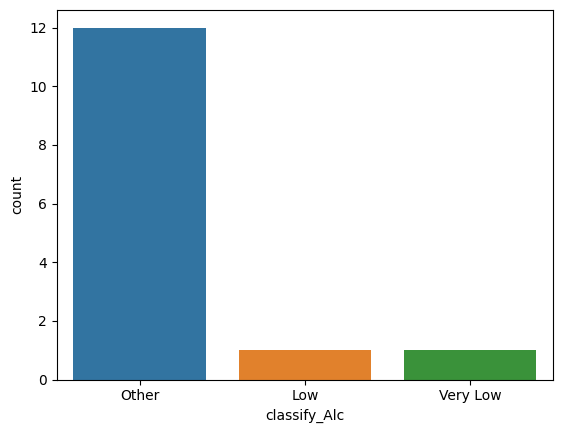

In [35]:
lowedu = ms[(ms['Fedu']<= 2) | (female['Medu'] <= 2)]
sns.countplot(data=lowedu, x='classify_Alc')

plt.show()
# happyfam = lowedu[lowedu['famrel'] >= 4]
# happyfam['classify_Alc'].value_counts()

In [36]:
ms_male = male[(male['school']=='MS') & male['Medu'] <=2]
ms_male

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,classify_Alc
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,2,8,8,Other
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,0,9,9,Very Low
118,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,14,12,11,Other
140,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,2,10,9,Other
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,MS,M,17,U,GT3,T,3,3,health,other,...,4,5,4,2,3,3,4,8,9,Other
600,MS,M,17,R,GT3,T,1,1,other,services,...,4,2,3,3,4,4,4,12,13,Other
612,MS,M,17,R,GT3,T,4,3,services,other,...,4,5,5,1,3,2,4,10,11,Other
638,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,4,14,15,Very Low


### 건강

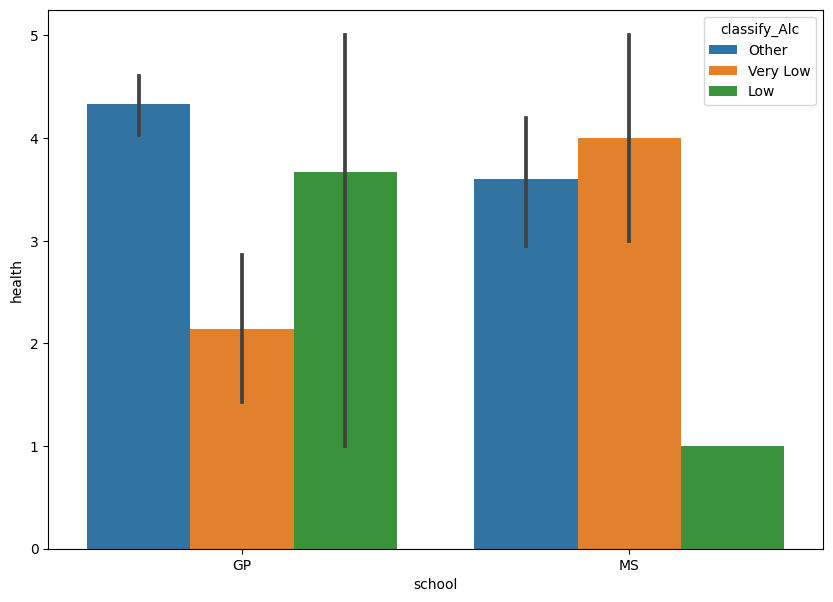

In [37]:
# health
# Medu
figure,axes =plt.subplots(figsize=(10,7))
sns.barplot(data=male, x='school', y='health', hue='classify_Alc')
plt.show()

# 건강은 좋은 편

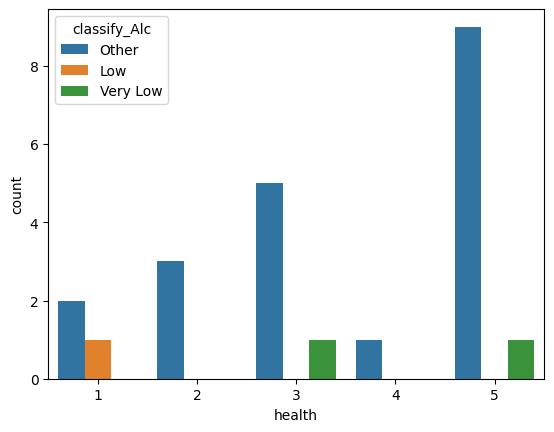

In [38]:
# ms 그룹만
sns.countplot(data=ms, x='health', hue='classify_Alc')
plt.show()

#### 결론
- 17세 남학생들의 음주 수준이 여학생보다 모든 학교에서 높았다. 이에 상관계수가 높은 컬럼을 살펴보니 부모님 교육 수준이 낮은 편이다. 가장 높은 교육 수준이 고등학교 이하, 고등 교육 수준으로, 자녀의 음주에 대한 민감도가 낮을 확률이 높다. 

In [39]:
print(lowedu['Mjob'].value_counts())
print('---'*10)
print(lowedu['Fjob'].value_counts())

# health나 teacher 같은 직업은 거의 없음

other       10
at_home      2
services     2
Name: Mjob, dtype: int64
------------------------------
other       8
services    6
Name: Fjob, dtype: int64


In [40]:
male

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,classify_Alc
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,2,8,8,Other
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,0,9,9,Very Low
118,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,14,12,11,Other
140,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,2,10,9,Other
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,MS,M,17,U,GT3,T,3,3,health,other,...,4,5,4,2,3,3,4,8,9,Other
600,MS,M,17,R,GT3,T,1,1,other,services,...,4,2,3,3,4,4,4,12,13,Other
612,MS,M,17,R,GT3,T,4,3,services,other,...,4,5,5,1,3,2,4,10,11,Other
638,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,4,14,15,Very Low


### 로지스틱 회귀
- male(17세 남학생)의 classify_Alc에 영향을 미치는 컬럼을 찾아보기 위해 진행함

In [41]:
from sklearn.linear_model import LogisticRegression

male1 = pd.get_dummies(male, columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2'], drop_first=True)

# 로지스틱 회귀 모델 학습
X = male1.drop('classify_Alc', axis=1)
y = male1['classify_Alc']

model = LogisticRegression()
model.fit(X, y)

# 피처의 계수 출력
print('피처 계수:', model.coef_)

# 피처 이름과 계수 매핑
feature_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# 계수의 절댓값을 기준으로 내림차순 정렬
feature_coef = feature_coef.reindex(feature_coef['Coefficient'].abs().sort_values(ascending=False).index)

# 결과 출력
feature_coef.head(20)

피처 계수: [[-0.0263672  -0.04878901  0.19691389  0.13641072 -0.10733221  0.09539778
   0.05023038 -0.0274118   0.08908304 -0.13595049  0.10907544 -0.07275916
  -0.05537693 -0.1784469  -0.07767825 -0.24041701 -0.18877317  0.21372292
   0.15034509  0.16094189 -0.0934403  -0.19834485 -0.00743249  0.25900173
  -0.0341907  -0.01201027  0.09995207 -0.11135418 -0.0051497  -0.03631825
   0.00892785  0.36017158 -0.04946977  0.06125031 -0.03822224  0.00501875
   0.08795073 -0.02227601  0.36156104 -0.0924222  -0.22321389 -0.16789889
   0.04157477 -0.26491617 -0.04075802  0.31728883 -0.26415319 -0.16155591
  -0.13349394  0.73623565 -0.08623593 -0.01461993 -0.05015865  0.72964235
  -0.20754024 -0.13595553 -0.11000576 -0.08870488 -0.09069835 -0.19123674
   0.07972777  0.06005032 -0.16670496 -0.05759267  0.13651476 -0.04937428
  -0.00817912 -0.01479687 -0.00544666 -0.00743249 -0.00447903 -0.04201915
  -0.03307651  0.04371043 -0.11468565 -0.0764817  -0.09075996  0.07539033
   0.09407442 -0.01382113 -0.04

,Feature,Coefficient
49,Dalc_2,0.736236
53,Walc_2,0.729642
38,famrel_3,0.361561
31,paid_yes,0.360172
45,goout_2,0.317289
43,freetime_4,-0.264916
46,goout_3,-0.264153
23,traveltime_2,0.259002
15,Fjob_other,-0.240417
40,famrel_5,-0.223214


In [87]:
from sklearn.linear_model import LogisticRegression

male1 = pd.get_dummies(ms, columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2'], drop_first=True)

# 로지스틱 회귀 모델 학습
X = male1.drop('classify_Alc', axis=1)
y = male1['classify_Alc']

model = LogisticRegression()
model.fit(X, y)

# 피처의 계수 출력
print('피처 계수:', model.coef_)

# 피처 이름과 계수 매핑
feature_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# 계수의 절댓값을 기준으로 내림차순 정렬
feature_coef = feature_coef.reindex(feature_coef['Coefficient'].abs().sort_values(ascending=False).index)

# 결과 출력
feature_coef.head(20)

피처 계수: [[ 0.07235248 -0.07827891  0.02577069 -0.06642116  0.20539427 -0.03670361
  -0.05051874  0.20202365 -0.09471105 -0.03102317 -0.03193267  0.08295213
  -0.04035273  0.1004332  -0.09406447 -0.11626216  0.23017002 -0.00424043
  -0.19090551  0.16121416 -0.04127569  0.16361354 -0.02369864 -0.0115763
   0.1351788   0.22162509 -0.12000681  0.06755663  0.03361984  0.08541618
  -0.10623612 -0.00478585 -0.00324528  0.08729939 -0.05893306 -0.02540738
  -0.02366787 -0.09864601 -0.05482152  0.21912072 -0.09057046 -0.04291829
  -0.07052384  0.19395798 -0.05658297 -0.03283339  0.22291697 -0.08181146
  -0.04724672 -0.04290075 -0.01859347 -0.07673966 -0.01031874 -0.13217395
  -0.02304808 -0.12565844 -0.00478585 -0.01747667 -0.01519553 -0.02524029
  -0.06256635 -0.00324528 -0.05364903 -0.02575119 -0.02489448  0.25944765
  -0.02518736 -0.02369864 -0.01519553 -0.00522706 -0.07460553 -0.02459007
  -0.06067628 -0.01515904  0.235749   -0.02518736]
 [-0.24986753 -0.03958991  0.24489833 -0.09634864 -0.07

,Feature,Coefficient
65,G1_13,0.259448
74,G2_14,0.235749
16,reason_other,0.230170
46,Walc_2,0.222917
25,paid_yes,0.221625
39,goout_2,0.219121
4,Medu_3,0.205394
7,Fedu_2,0.202024
43,Dalc_2,0.193958
18,guardian_mother,-0.190906


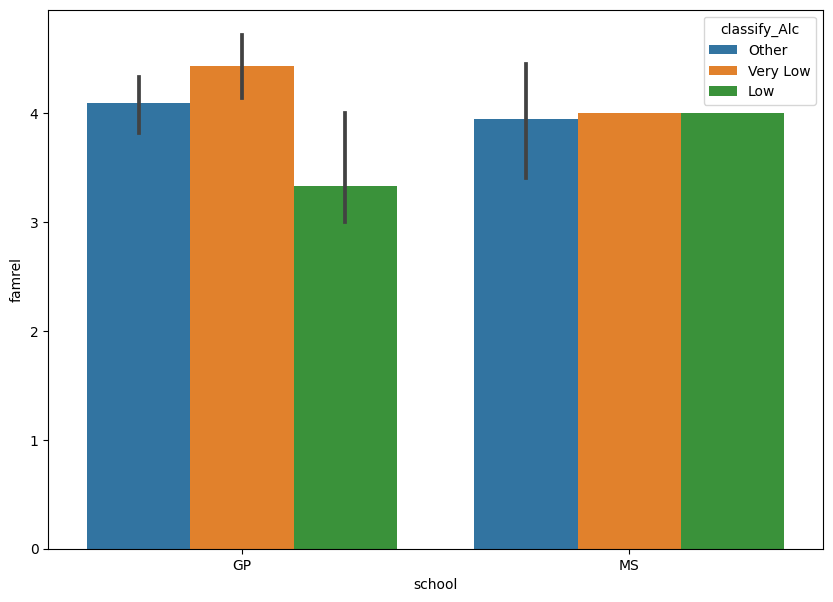

In [42]:
# famrel
figure,axes =plt.subplots(figsize=(10,7))
sns.barplot(data=male, x='school', y='famrel', hue='classify_Alc')
plt.show()

# 전반적으로 가족관계가 좋음.

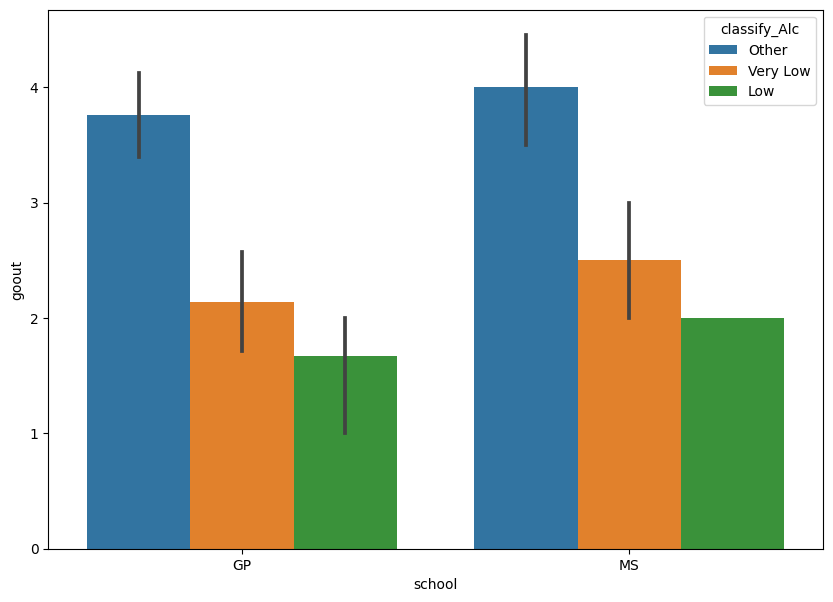

In [43]:
# goout
figure,axes =plt.subplots(figsize=(10,7))
sns.barplot(data=male, x='school', y='goout', hue='classify_Alc')
plt.show()

# other 그룹의 goout 비율이 높음

- 17세 학생 중에서도
- 남학생이고
- 부모님 교육 수준이 낮고
- 가족관계는 화목할수록
- 음주 수준이 높다

##### 위의 의견을 확인

In [44]:
lowedu = male[(male['Fedu']<= 3) & (male['Medu'] <= 3)]
happyfam = lowedu[lowedu['famrel'] >= 4]

In [45]:
happyfam['classify_Alc'].value_counts()

Other       33
Very Low     8
Low          1
Name: classify_Alc, dtype: int64

In [46]:
happyfam[['school','classify_Alc']].value_counts()

school  classify_Alc
GP      Other           20
MS      Other           13
GP      Very Low         6
MS      Very Low         2
        Low              1
dtype: int64

##### 여학생과 비교

In [47]:
lowedu = female[(female['Fedu']<= 3) & (female['Medu'] <= 3)]
happyfam = lowedu[lowedu['famrel'] >= 4]
happyfam['classify_Alc'].value_counts()
# 여학생은 very low와 other 비슷

Other       28
Very Low    22
Low          5
Name: classify_Alc, dtype: int64

In [48]:
male = df[df['sex']=='M']

#### 전체 그래프 관련 내용

In [49]:
df_male = df[df['sex']=='M']
df_male

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,classify_Alc
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,2,8,8,Other
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,0,9,9,Very Low
118,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,14,12,11,Other
140,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,2,10,9,Other
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,MS,M,17,U,GT3,T,3,3,health,other,...,4,5,4,2,3,3,4,8,9,Other
600,MS,M,17,R,GT3,T,1,1,other,services,...,4,2,3,3,4,4,4,12,13,Other
612,MS,M,17,R,GT3,T,4,3,services,other,...,4,5,5,1,3,2,4,10,11,Other
638,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,4,14,15,Very Low


In [50]:
df_male.corr()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,6.752161e-01,-0.196700,0.141855,-0.035597,0.156030,7.638536e-02,-0.152764,-0.062367,0.135503,0.001592,0.213539,0.165567
Fedu,NaN,0.675216,1.000000e+00,-0.171313,0.243253,0.077095,-0.082078,3.473016e-17,-0.094971,-0.007095,0.131496,-0.108448,0.227671,0.188962
traveltime,NaN,-0.196700,-1.713132e-01,1.000000,0.021519,-0.002857,0.016129,2.201037e-01,0.066097,0.118086,-0.042742,-0.124618,-0.208665,-0.171964
studytime,NaN,0.141855,2.432531e-01,0.021519,1.000000,-0.090081,0.077955,1.435959e-01,-0.101178,0.050959,-0.146036,-0.195739,0.246692,0.214996
famrel,NaN,-0.035597,7.709468e-02,-0.002857,-0.090081,1.000000,0.022853,1.914995e-01,0.074779,-0.006290,-0.004462,0.017757,-0.068466,0.151294
freetime,NaN,0.156030,-8.207833e-02,0.016129,0.077955,0.022853,1.000000,4.314046e-01,0.008263,0.121760,-0.036172,0.051425,0.031939,0.092342
goout,NaN,0.076385,3.473016e-17,0.220104,0.143596,0.191499,0.431405,1.000000e+00,0.286276,0.597062,0.026676,0.209550,-0.103240,-0.026084
Dalc,NaN,-0.152764,-9.497110e-02,0.066097,-0.101178,0.074779,0.008263,2.862756e-01,1.000000,0.680995,-0.069244,0.181014,-0.118066,-0.009721
Walc,NaN,-0.062367,-7.094831e-03,0.118086,0.050959,-0.006290,0.121760,5.970624e-01,0.680995,1.000000,0.180696,0.183586,-0.143611,-0.106393


from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(8, 6))
mosaic(df_male, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'classify_Alc'], title='Mosaic Plot')
plt.show()

In [51]:
df_male.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'classify_Alc'],
      dtype='object')

In [52]:
male

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,classify_Alc
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,2,8,8,Other
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,0,9,9,Very Low
118,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,14,12,11,Other
140,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,2,10,9,Other
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,MS,M,17,U,GT3,T,3,3,health,other,...,4,5,4,2,3,3,4,8,9,Other
600,MS,M,17,R,GT3,T,1,1,other,services,...,4,2,3,3,4,4,4,12,13,Other
612,MS,M,17,R,GT3,T,4,3,services,other,...,4,5,5,1,3,2,4,10,11,Other
638,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,4,14,15,Very Low


In [53]:
male.groupby('Medu')['classify_Alc'].value_counts()

Medu  classify_Alc
1     Other           14
      Very Low         2
      Low              1
2     Other           11
      Very Low         5
      Low              1
3     Other           15
      Low              1
      Very Low         1
4     Other           13
      Low              1
      Very Low         1
Name: classify_Alc, dtype: int64

In [54]:
df.groupby('Fedu')['classify_Alc'].value_counts()
# 아버지의 교육 수준이 낮을 때 very low 데이터만 존재하여 확인
# Fedu ==0 의 데이터가 모두 very low였고, 3개 뿐인 데이터라 유의미한 결론이라 보기 어려움

Fedu  classify_Alc
0     Very Low         3
1     Other           30
      Very Low        14
      Low              6
2     Other           39
      Very Low        17
      Low              4
3     Other           24
      Very Low         9
4     Other           22
      Very Low        10
      Low              1
Name: classify_Alc, dtype: int64

In [55]:
df.groupby('Fjob')['classify_Alc'].value_counts()

Fjob      classify_Alc
at_home   Other            7
          Very Low         6
          Low              3
health    Other            2
          Very Low         2
other     Other           71
          Very Low        29
          Low              6
services  Other           30
          Very Low        12
          Low              1
teacher   Other            5
          Very Low         4
          Low              1
Name: classify_Alc, dtype: int64

In [56]:
df.groupby('reason')['classify_Alc'].value_counts(normalize=True)
# 어떤 이유이든지 Other이 높아서 유의미하다고 하기 어렵지 않을까?

reason      classify_Alc
course      Other           0.604651
            Very Low        0.337209
            Low             0.058140
home        Other           0.611111
            Very Low        0.277778
            Low             0.111111
other       Other           0.684211
            Very Low        0.210526
            Low             0.105263
reputation  Other           0.736842
            Very Low        0.263158
Name: classify_Alc, dtype: float64

In [57]:
print(df.groupby('schoolsup')['classify_Alc'].value_counts())
print(df.groupby('schoolsup')['classify_Alc'].value_counts(normalize=True))
# no 데이터가 많긴 하지만, 지원이 없는 경우 음주 수준이 other로 높음
# yes의 경우 very low가 50% 이상

schoolsup  classify_Alc
no         Other           110
           Very Low         47
           Low              11
yes        Very Low          6
           Other             5
Name: classify_Alc, dtype: int64
schoolsup  classify_Alc
no         Other           0.654762
           Very Low        0.279762
           Low             0.065476
yes        Very Low        0.545455
           Other           0.454545
Name: classify_Alc, dtype: float64


In [58]:
schoolsupO = df[df['schoolsup']=='yes']
schoolsupO.groupby('classify_Alc')['school'].value_counts()

classify_Alc  school
Other         GP        3
              MS        2
Very Low      GP        5
              MS        1
Name: school, dtype: int64

In [59]:
print(df.groupby('higher')['classify_Alc'].value_counts())
print(df.groupby('higher')['classify_Alc'].value_counts(normalize=True))

higher  classify_Alc
no      Other             6
        Very Low          6
        Low               4
yes     Other           109
        Very Low         47
        Low               7
Name: classify_Alc, dtype: int64
higher  classify_Alc
no      Other           0.375000
        Very Low        0.375000
        Low             0.250000
yes     Other           0.668712
        Very Low        0.288344
        Low             0.042945
Name: classify_Alc, dtype: float64


In [60]:
print(df.groupby('higher')[['classify_Alc','school']].value_counts(normalize=True))
# yes 인 경우 GP 학교 비율이 높았음

higher  classify_Alc  school
no      Other         MS        0.250000
        Very Low      GP        0.250000
        Low           MS        0.187500
        Other         GP        0.125000
        Very Low      MS        0.125000
        Low           GP        0.062500
yes     Other         GP        0.447853
                      MS        0.220859
        Very Low      GP        0.196319
                      MS        0.092025
        Low           GP        0.030675
                      MS        0.012270
dtype: float64


In [61]:
print(df.groupby('internet')[['classify_Alc','school']].value_counts(normalize=True))
# yes 인 경우 GP 학교 비율이 높았음

internet  classify_Alc  school
no        Other         MS        0.272727
          Very Low      GP        0.272727
          Other         GP        0.204545
          Very Low      MS        0.181818
          Low           MS        0.045455
                        GP        0.022727
yes       Other         GP        0.488889
                        MS        0.207407
          Very Low      GP        0.177778
                        MS        0.066667
          Low           GP        0.037037
                        MS        0.022222
dtype: float64


In [62]:
print(df.groupby('famrel')['classify_Alc'].value_counts())

famrel  classify_Alc
1       Other            3
2       Other            4
        Very Low         2
3       Other           15
        Very Low         6
        Low              4
4       Other           60
        Very Low        29
        Low              6
5       Other           33
        Very Low        16
        Low              1
Name: classify_Alc, dtype: int64


In [63]:
print(df.groupby('goout')['classify_Alc'].value_counts())

goout  classify_Alc
1      Other            6
       Very Low         6
       Low              1
2      Other           16
       Very Low        16
       Low              4
3      Other           31
       Very Low        21
       Low              3
4      Other           31
       Very Low         8
       Low              2
5      Other           31
       Very Low         2
       Low              1
Name: classify_Alc, dtype: int64


In [64]:
print(df.groupby('absences')['classify_Alc'].value_counts())
# 애초에 other 그룹의 결석이 빈번한 것 같기는 함
# 근데 15일 이상부터는 1~2명씩 결석한 거라...

absences  classify_Alc
0         Other           44
          Very Low        22
          Low              4
1         Other            1
          Very Low         1
2         Other           18
          Very Low        12
          Low              2
3         Low              1
4         Other           14
          Very Low         8
5         Other            3
          Low              2
6         Other            6
          Very Low         2
8         Other            7
          Very Low         4
          Low              1
9         Other            1
10        Other            5
          Very Low         2
          Low              1
12        Other            2
          Very Low         1
14        Other            4
          Very Low         1
15        Other            1
16        Other            2
18        Other            2
21        Other            1
22        Other            2
30        Other            1
32        Other            1
Name: classify_Alc, 

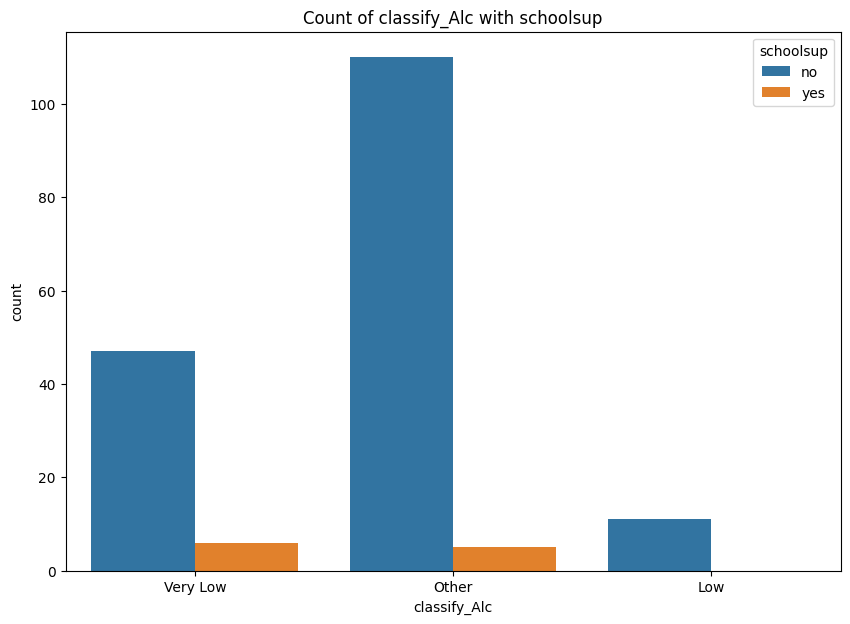

In [65]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.countplot(data=df, x='classify_Alc', hue='schoolsup')

plt.title('Count of classify_Alc with schoolsup')

plt.legend(title='schoolsup', loc='upper right')

plt.show()

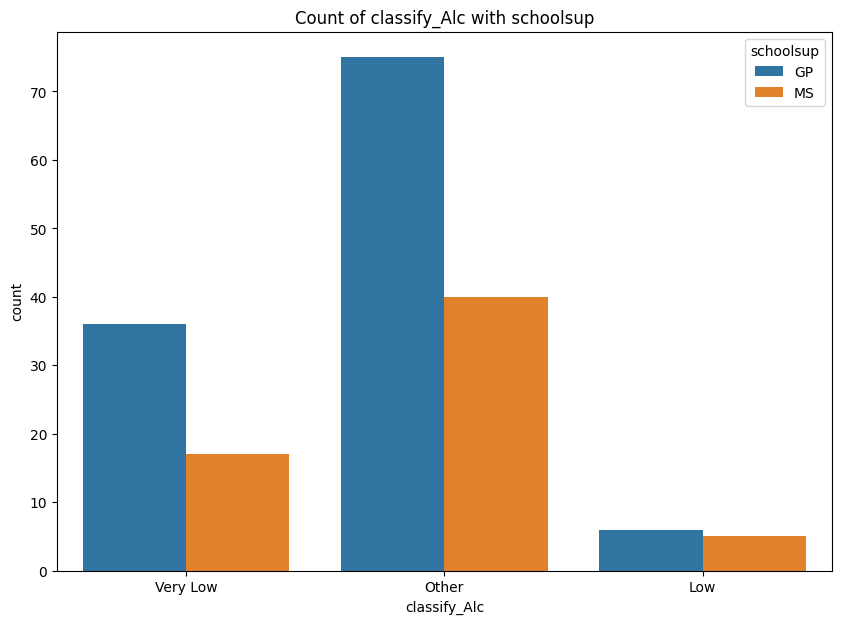

In [66]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.countplot(data=df, x='classify_Alc', hue='school')

plt.title('Count of classify_Alc with schoolsup')

plt.legend(title='schoolsup', loc='upper right')

plt.show()

### 학교별 알코올 수준 집단 분류

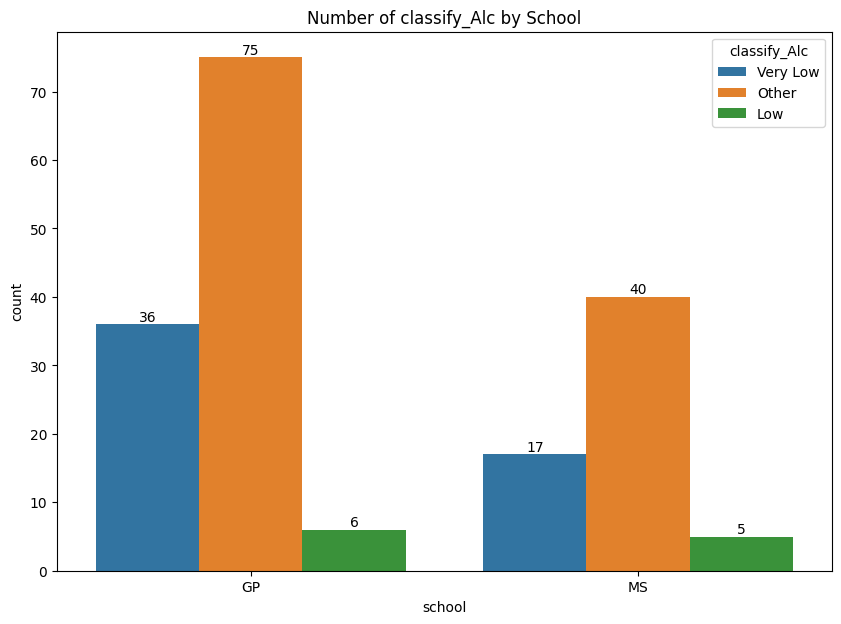

In [67]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.countplot(data=df, hue='classify_Alc', x='school')

plt.title('Number of classify_Alc by School')

for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x() + p.get_width() / 2., height + 0.5,
              f'{int(height)}',  
              ha="center")

plt.legend(title='classify_Alc', loc='upper right')

plt.show()

C:\Users\parky\AppData\Local\Temp\ipykernel_18780\686006943.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_percentage = df.groupby(['school', 'classify_Alc']).size().unstack() / df.groupby('school').size()[:, None]


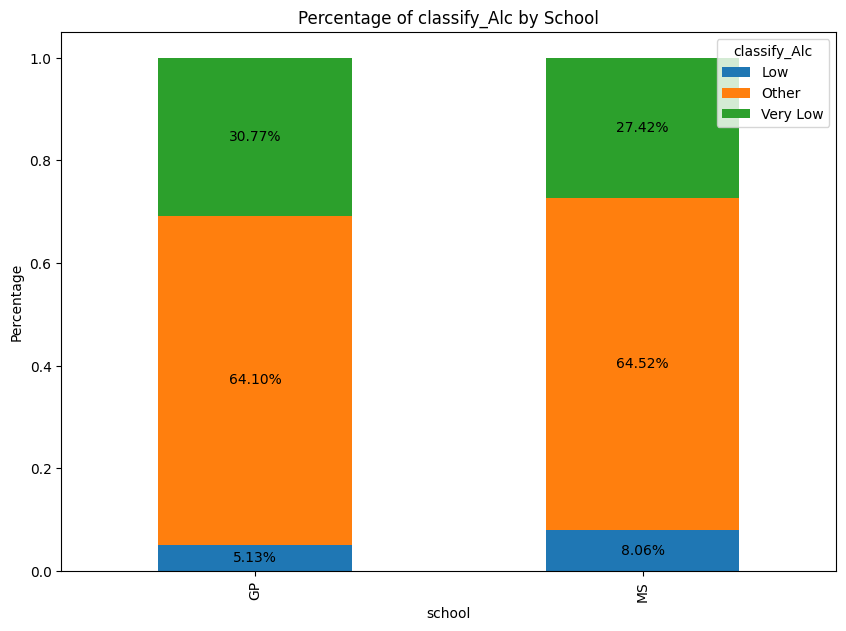

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_percentage = df.groupby(['school', 'classify_Alc']).size().unstack() / df.groupby('school').size()[:, None]

fig, axes = plt.subplots(figsize=(10, 7))

df_percentage.plot(kind='bar', stacked=True, ax=axes)

for p in axes.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Percentage of classify_Alc by School')

plt.legend(title='classify_Alc', loc='upper right')

plt.ylabel('Percentage')

plt.show()


### 남학생 데이터

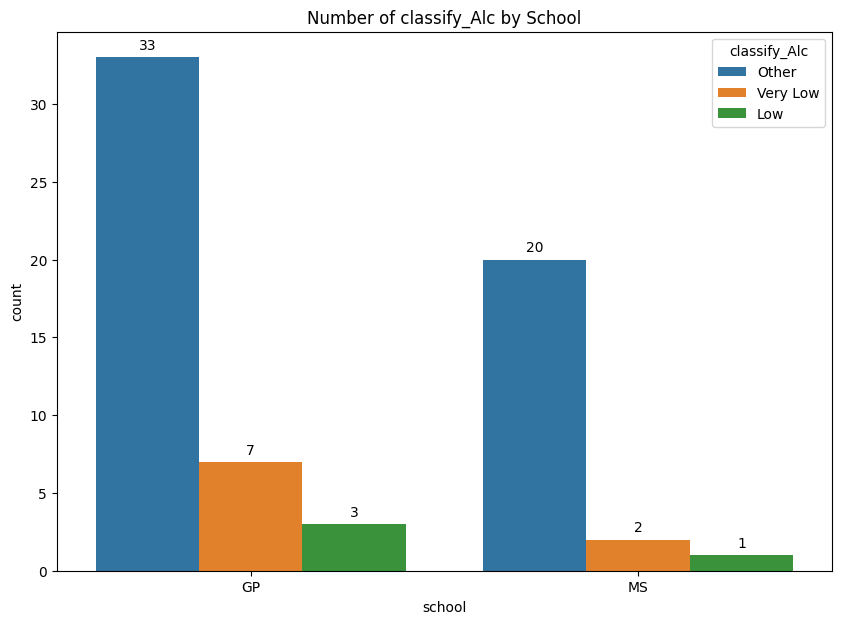

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(figsize=(10, 7))


sns.countplot(data=male, hue='classify_Alc', x='school', ax=axes)

for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x() + p.get_width() / 2., height + 0.5,
              f'{int(height)}',  
              ha="center")

plt.title('Number of classify_Alc by School')

plt.legend(title='classify_Alc', loc='upper right')

plt.show()


C:\Users\parky\AppData\Local\Temp\ipykernel_18780\848172288.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  male_percentage = male.groupby(['school', 'classify_Alc']).size().unstack() / male.groupby('school').size()[:, None]


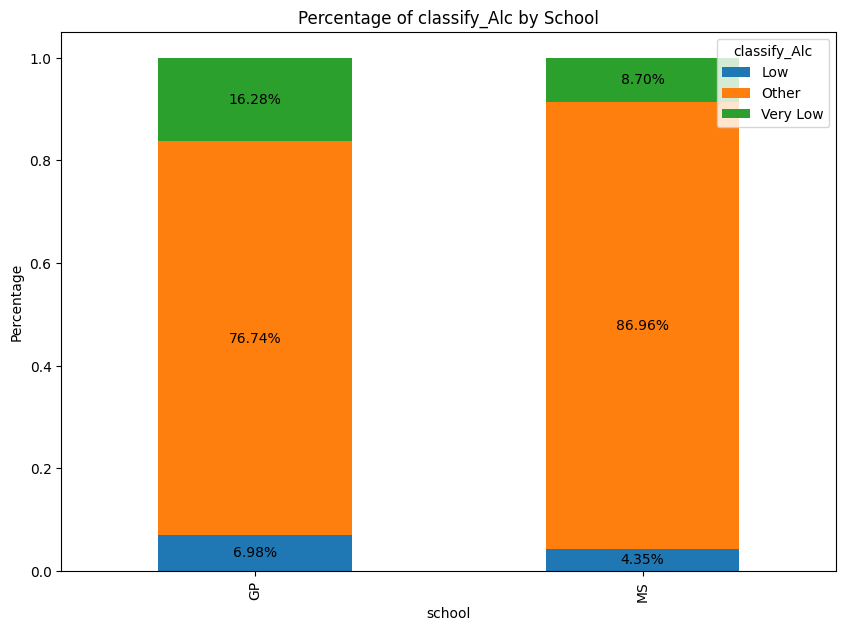

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

male_percentage = male.groupby(['school', 'classify_Alc']).size().unstack() / male.groupby('school').size()[:, None]

fig, axes = plt.subplots(figsize=(10, 7))

male_percentage.plot(kind='bar', stacked=True, ax=axes)

# Add percentage labels on top of each bar
for p in axes.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center', va='center')

# Set plot title
plt.title('Percentage of classify_Alc by School')

# Set legend
plt.legend(title='classify_Alc', loc='upper right')

# Set y-axis label as percentage
plt.ylabel('Percentage')

# Show the plot
plt.show()


### 남학생 학교별로 확인

In [71]:
gp = male[male['school']=='GP']
ms = male[male['school']=='MS']

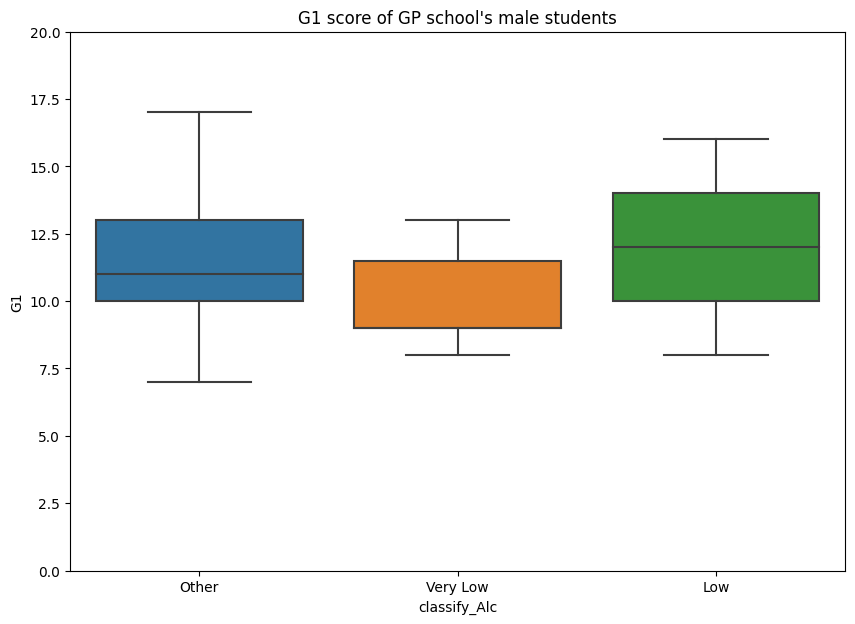

In [72]:
figure,axes =plt.subplots(figsize=(10,7))
sns.boxplot(data=gp, y='G1', x='classify_Alc')
plt.title("G1 score of GP school's male students")
plt.ylim(0,20)
plt.show()

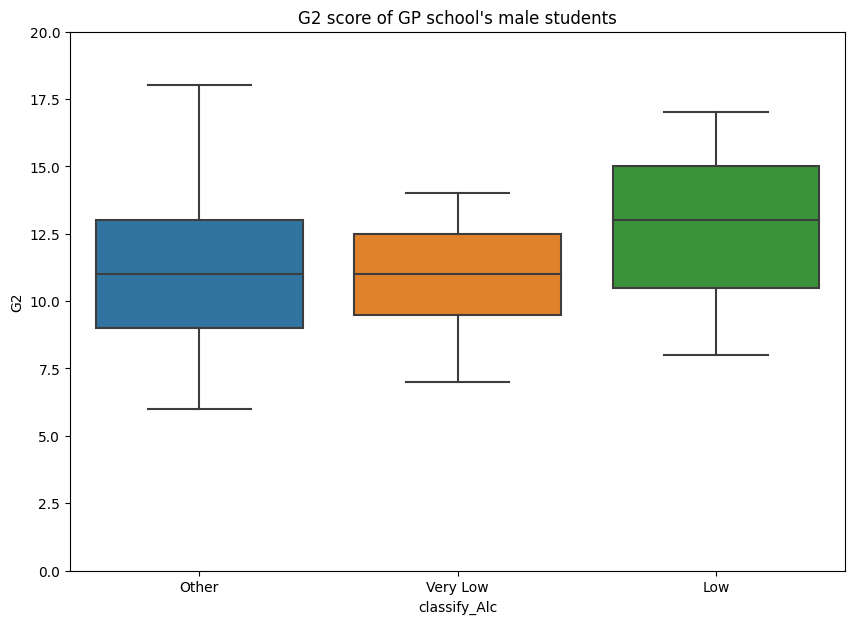

In [73]:
figure,axes =plt.subplots(figsize=(10,7))
sns.boxplot(data=gp, y='G2', x='classify_Alc')
plt.title("G2 score of GP school's male students")
plt.ylim(0,20)
plt.show()

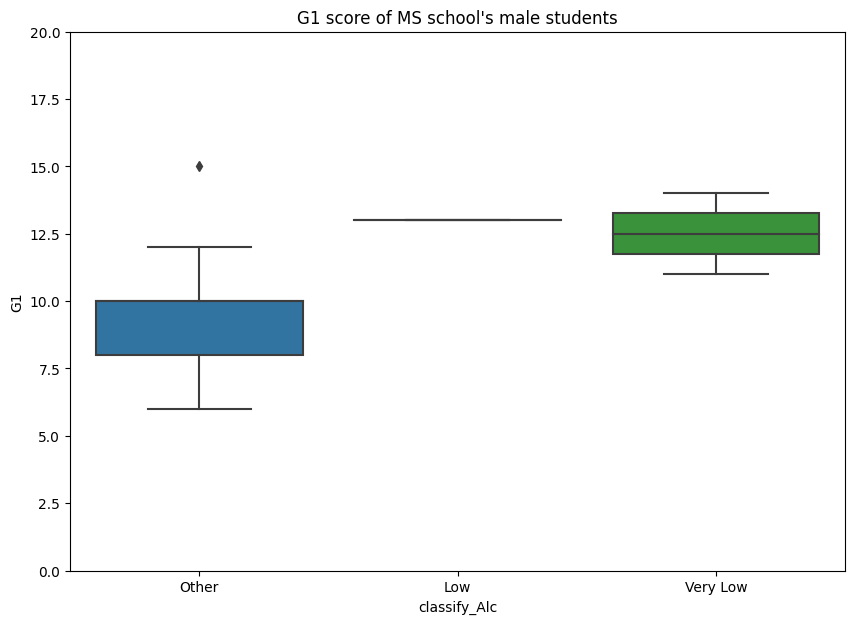

In [74]:
figure,axes =plt.subplots(figsize=(10,7))
sns.boxplot(data=ms, y='G1', x='classify_Alc')
plt.title("G1 score of MS school's male students")
plt.ylim(0,20)
plt.show()

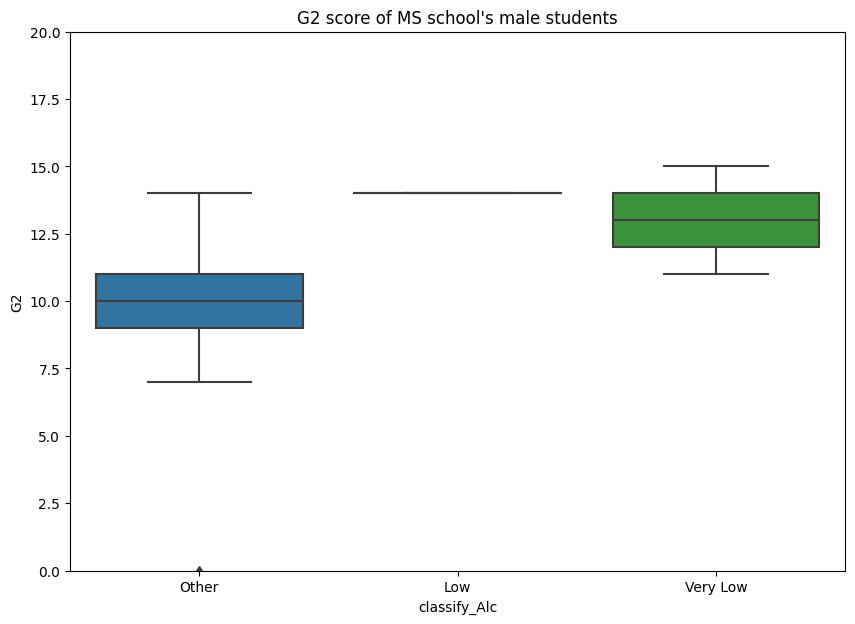

In [75]:
figure,axes =plt.subplots(figsize=(10,7))
sns.boxplot(data=ms, y='G2', x='classify_Alc')
plt.title("G2 score of MS school's male students")
plt.ylim(0,20)
plt.show()

In [76]:
male.groupby(['school','classify_Alc'])['G1'].mean()

school  classify_Alc
GP      Low             12.000000
        Other           11.303030
        Very Low        10.142857
MS      Low             13.000000
        Other            9.400000
        Very Low        12.500000
Name: G1, dtype: float64

In [77]:
male.groupby(['school','classify_Alc'])['G2'].mean()

school  classify_Alc
GP      Low             12.666667
        Other           11.272727
        Very Low        10.857143
MS      Low             14.000000
        Other            9.650000
        Very Low        13.000000
Name: G2, dtype: float64

In [78]:
female.groupby(['school','classify_Alc'])['G1'].mean()

school  classify_Alc
GP      Low             11.333333
        Other           13.047619
        Very Low        12.517241
MS      Low              8.250000
        Other           11.250000
        Very Low        10.200000
Name: G1, dtype: float64

In [79]:
female.groupby(['school','classify_Alc'])['G2'].mean()

school  classify_Alc
GP      Low             12.666667
        Other           13.357143
        Very Low        12.827586
MS      Low              8.750000
        Other           11.500000
        Very Low        11.066667
Name: G2, dtype: float64

#### ms 학교 17세 남학생 분석

<Axes: >

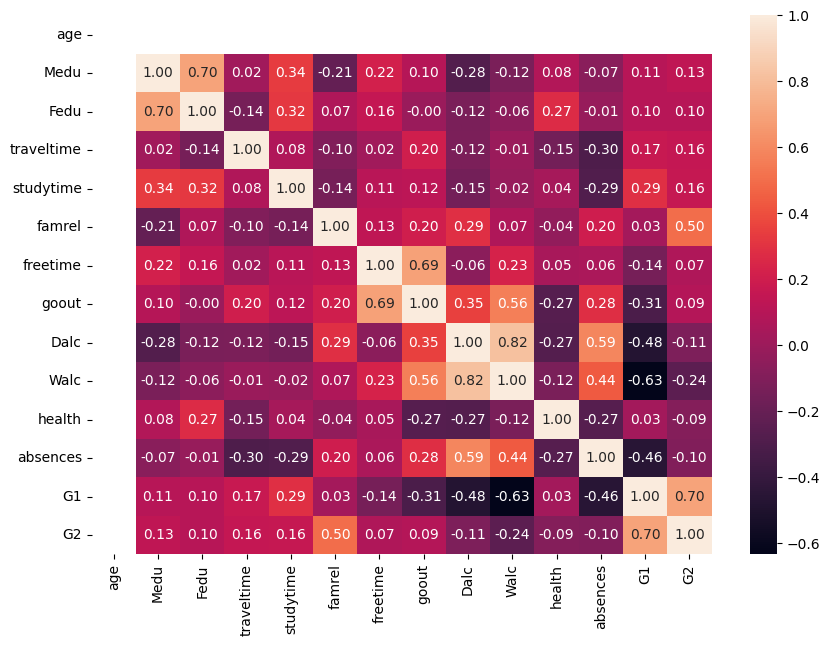

In [80]:
ms.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data=ms.corr(), annot=True, fmt='.2f')


In [81]:
ms.groupby('classify_Alc')['schoolsup'].value_counts()

classify_Alc  schoolsup
Low           no            1
Other         no           20
Very Low      no            2
Name: schoolsup, dtype: int64

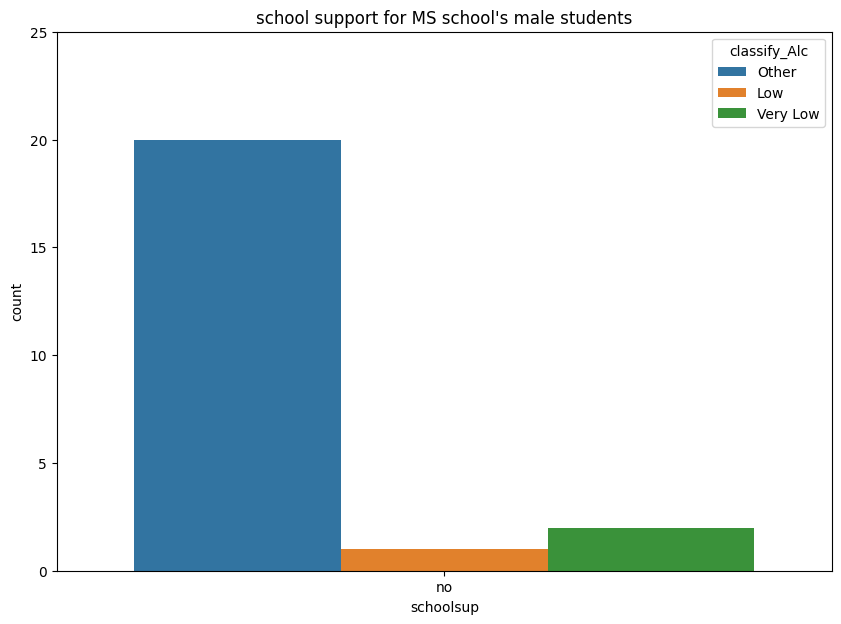

In [82]:
figure,axes =plt.subplots(figsize=(10,7))
sns.countplot(data=ms, x='schoolsup', hue='classify_Alc')
plt.title("school support for MS school's male students")
plt.ylim(0,25)
plt.show()

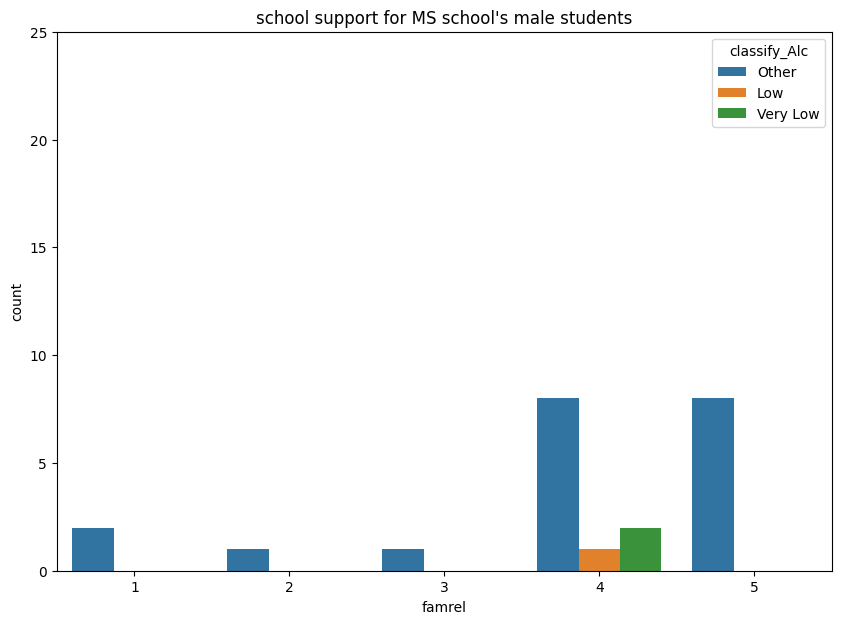

In [83]:
figure,axes =plt.subplots(figsize=(10,7))
sns.countplot(data=ms, x='famrel', hue='classify_Alc')
plt.title("school support for MS school's male students")
plt.ylim(0,25)
plt.show()

In [85]:
ms['Fjob'].value_counts()

other       13
services     9
at_home      1
Name: Fjob, dtype: int64

In [86]:
ms['traveltime'].value_counts()

2    9
1    8
3    6
Name: traveltime, dtype: int64

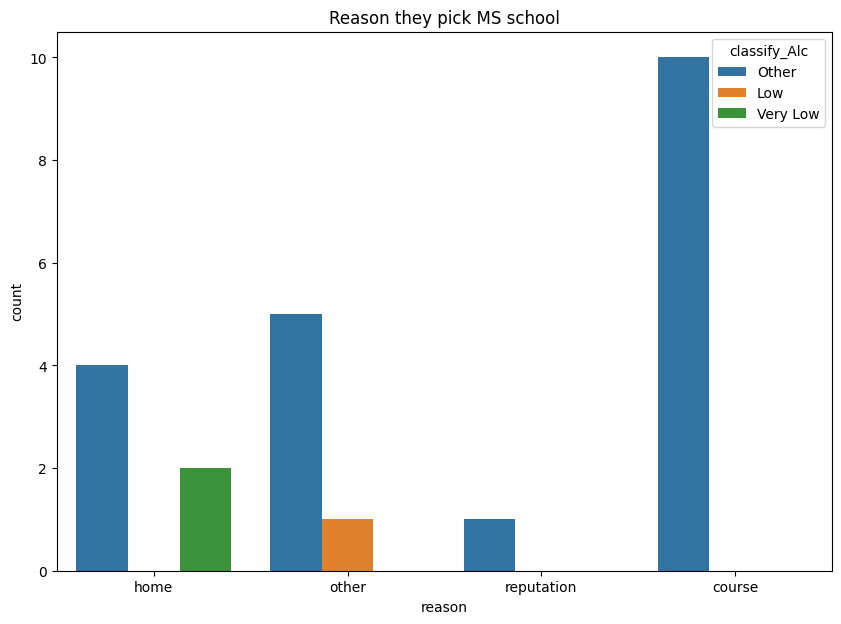

In [96]:
figure,axes =plt.subplots(figsize=(10,7))
sns.countplot(data=ms, x='reason', hue='classify_Alc')
plt.title("Reason they pick MS school")
plt.show()

KeyError: 'y'

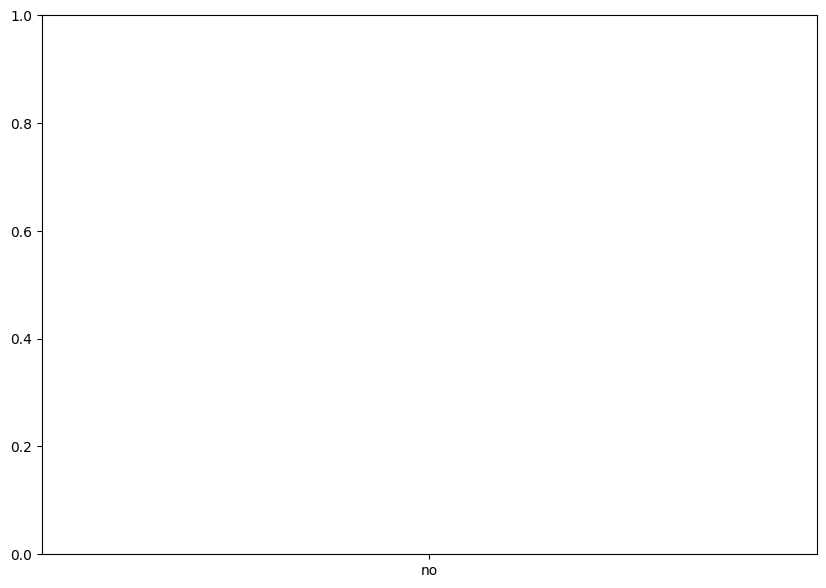

In [97]:
figure,axes =plt.subplots(figsize=(10,7))
sns.lineplot(data=ms, x='schoolsup',hue='reason', hue='classify_Alc')
plt.title("school support for MS school's male students")
plt.show()